In [1]:
# Load modules
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
import cartopy.feature as cf                                                                                                        
from pathlib import Path
import psyplot.project as psy
import sys

# #own scripts
sys.path.append('../utilities_tlezuo/')
from timefunctions import *
import varfunctions
import datetime as dt

from iconarray.plot import formatoptions # import plotting formatoptions (for use with psyplot)
import iconarray as iconvis # import self-written modules from iconarray

import locfunctions as lf

INFO:numexpr.utils:Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
plotdate = dt.datetime(2019,9,13,8,30)
simdate = dt.datetime(2019,9,12,12,00)
lt = get_lt(plotdate,simdate)

print(lt)
filename = lfff_name(lt)
nc_file = '/store/s83/swester/teamx/tdf_2019091212/output/19091212/'+filename
# If necessary, add the corresponding grid file:
grid_file = '../data/example_data/grids/ICON-1E_DOM01.nc'

if iconvis.check_grid_information(nc_file):
    print('The grid information is available')
    data = psy.open_dataset(nc_file)
else:
    print('The grid information is not available')
    data = iconvis.combine_grid_information(nc_file,grid_file)

print(filename)

20.5
The grid information is available
lfff00203000.nc


In [3]:
# show figures after they are drawn or updated
psy.rcParams['auto_show'] = True

%matplotlib inline
%config InlineBackend.close_figures = False

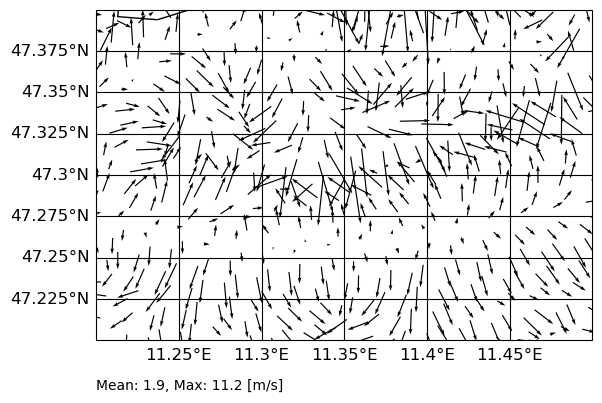

In [14]:
area=lf.zoom
ppv = psy.plot.mapvector(data, 
                    name=[['u_10m', 'v_10m']], 
                    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
                    arrowsize=20)


psyplot.project.Project([arr5: psyplot.data.InteractiveList([
    arr0: 1-dim DataArray of T_2M, with (ncells)=(895688,), time=2019-09-13T08:30:00, height=2.0,
    arr1: 2-dim DataArray of u_10m, v_10m, with (variable, ncells)=(2, 895688), time=2019-09-13T08:30:00, height_2=10.0])])

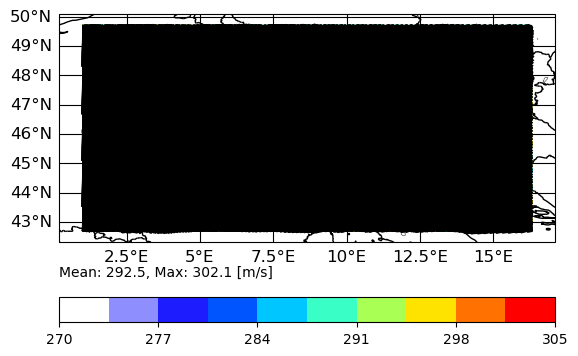

In [17]:
psy.plot.mapcombined(data, name=[['T_2M', ['u_10m', 'v_10m']]], lonlatbox='Europe',
                            arrowsize=1000)

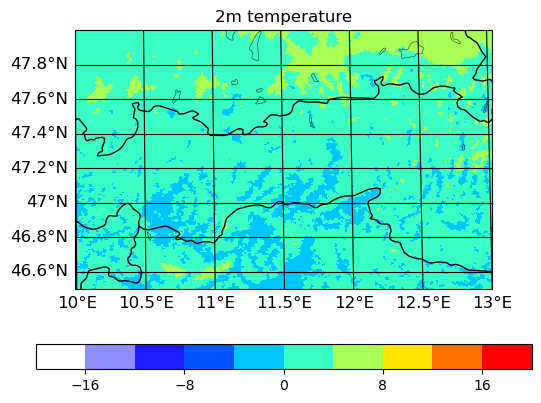

In [5]:
area=lf.inn_area
data_plot = data.sel(height_3=70)
pp = psy.plot.mapplot(data_plot,
    name = 'U',
    t = 0,
    projection = 'robin',
    bounds = {'method': 'minmax', 'vmin':-20, 'vmax':20},
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    title = '2m temperature')

In [27]:
from wrf import interplevel

Plev = 850
T_Plev = interplevel(data.T, data.P, Plev*100)

In [28]:
import numpy as np
np.isnan(T_Plev).sum()

<xarray.DataArray 'T_interp' ()>
array(71655040)
Coordinates:
    level    int64 85000

In [ ]:
pp = psy.plot.mapplot(T_500hPa,
    name = 'U',
    t = 0,
    projection = 'robin',
    bounds = {'method': 'minmax', 'vmin':-20, 'vmax':20},
    map_extent = [area.lonmin, area.lonmax, area.latmin, area.latmax],
    title = '2m temperature')

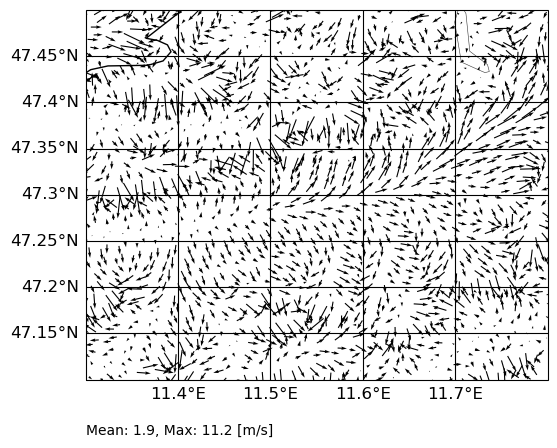

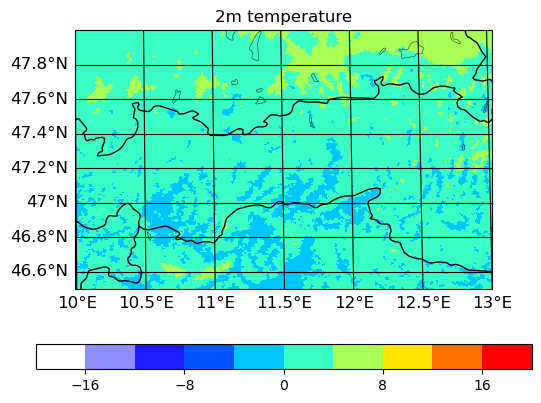

In [7]:
latmin = 47.1
lonmin = 11.3
latmax = 47.5
lonmax = 11.8

ppv.update(map_extent = [lonmin, lonmax, latmin, latmax])

In [8]:
print(len(area.locmarks))

10


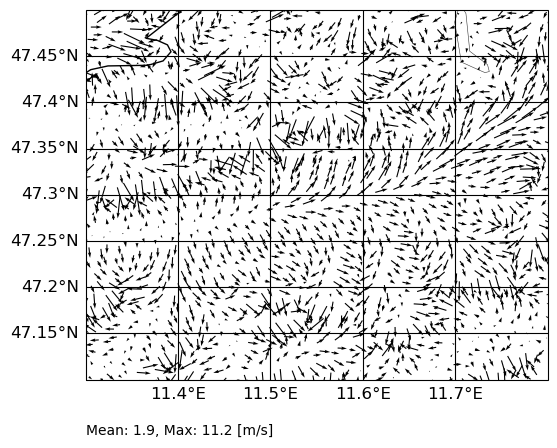

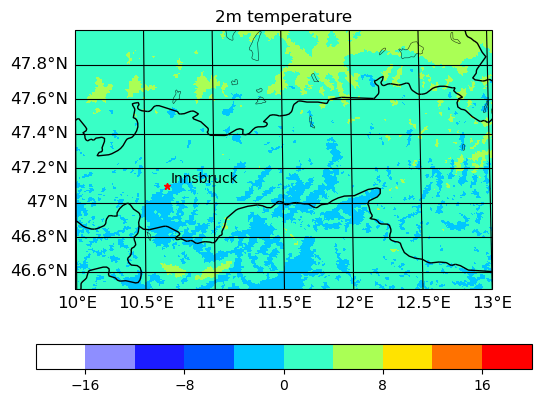

In [9]:
# Add coordinates Innsbruck
lon = 11.41
lat = 47.26
pos_lon,pos_lat = iconvis.add_coordinates(lon,lat,lonmin,lonmax,latmin,latmax)

# go to matplotlib level for adding coordinate                                                                                                    
fig = plt.gcf()
fig.axes[0].plot(pos_lon, pos_lat,'r',marker='*', markersize=5, transform=fig.axes[0].transAxes) 
fig.axes[0].text(pos_lon+0.01, pos_lat+0.01, 'Innsbruck', transform=fig.axes[0].transAxes)

pp.update()

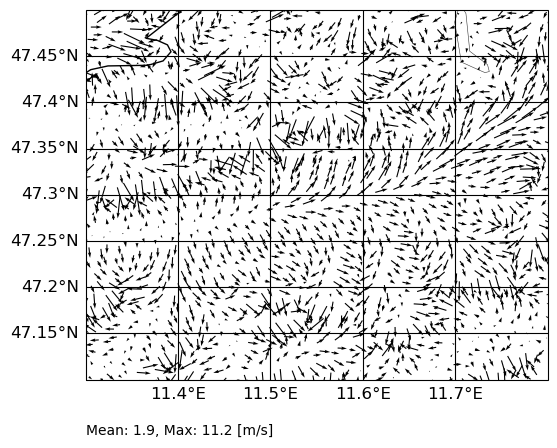

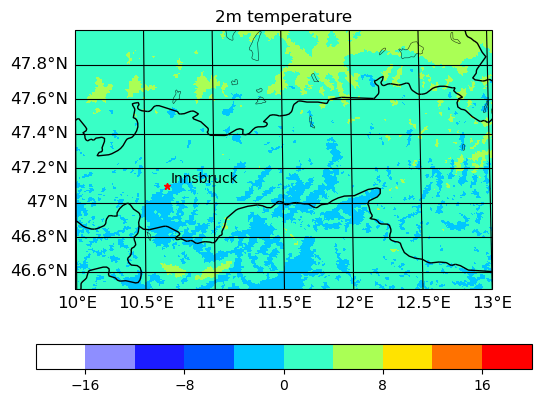

In [10]:
# save figure
pp.update()
output_file = 'mapplot_test'
plt.savefig(output_file)

In [11]:
#test_op_path = /store/s83/tsm/ICON-1E/FCST22/22100500_614/grib/i1effsurf008_000
